# Cloropleth Mapping

## Introduction

PySAL was initially created for computational spatial data analysis and spatial econometrics and not visualization, but some basic visualization is possible with the library. 

This tutorial will cover how to use PySAL and some other packages to create publishable cloropleth maps. The packages covered will include:

* geopandas
* folium
* cartopy
* bokeh

## PySAL Viz Module

The PySAL mapping module has three levels:
    
* __Lower-level__: reads point, line, polygon shapefiles and returns Matplotlib collection
* __Medium-level__: performs transformations on a Matplotlib object (e.g. color-code polygons according to values)
* __High-level__: end result for users, style preferences predefined (e.g. finished cloropleth map)


In [2]:
%matplotlib inline
import numpy as np
import pysal as ps
import random as rdm
from pysal.contrib.viz import mapping as maps
from pylab import *

### Lower-level

This level has basic funcitonality to read spatial data from a file (ONLY SHAPEFILES SUPPORTED) and produce a rudimentary Matplotlib object. The main methods are:

* map_poly_shape: to read in polygon shapefiles
* map_line_shape: to read in line shapefiles
* map_point_shape: to read in point shapefiles

These methods have the ability to be plotted when data is missing. They can also be overlaid and combined using `setup_ax`. The resulting object is basic, but flexible. Matplotlib allows us to modify almost any property and attribute:

#### Example using `map_poly_shape`:

C:\Anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


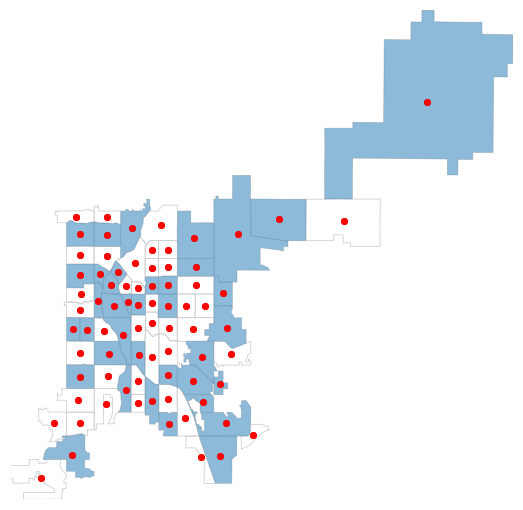

In [3]:
shp_path = r'C:\Users\aolson\Documents\Working\Python\DenverData\Denver_Census_2010.shp'
shp = ps.open(shp_path)
some = [bool(rdm.getrandbits(1)) for i in ps.open(shp_path)]

fig = figure(figsize=(9,9))

base = maps.map_poly_shp(shp)
base.set_facecolor('none')
base.set_linewidth(0.75)
base.set_edgecolor('0.8')
some = maps.map_poly_shp(shp, which=some)
some.set_alpha(0.5)
some.set_linewidth(0.)
cents = np.array([poly.centroid for poly in ps.open(shp_path)])
pts = scatter(cents[:, 0], cents[:, 1])
pts.set_color('red')

ax = maps.setup_ax([base, some, pts], [shp.bbox, shp.bbox, shp.bbox])
fig.add_axes(ax)
show()

maps.map_poly_shp(shp)

#### Example using `map_point_shape`:

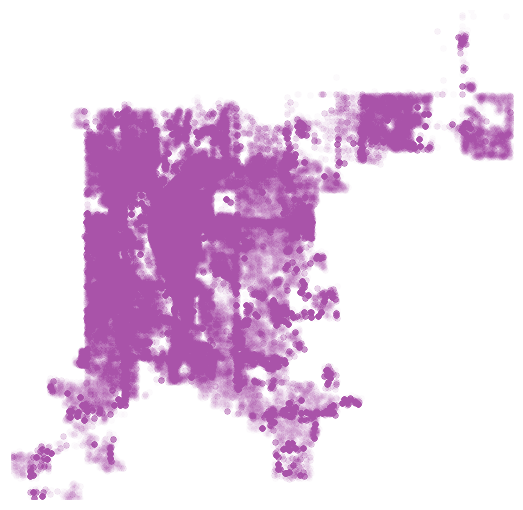

In [4]:
shp_path = r'C:\Users\aolson\Documents\Working\Python\DenverData\Denver_Crime.shp'
pnt = ps.open(shp_path)

fig = figure(figsize=(9,9))

base = maps.map_point_shp(pnt)
base.set_color('purple')
base.set_alpha(0.01)

ax = maps.setup_ax([base], [pnt.bbox, pnt.bbox, pnt.bbox])
fig.add_axes(ax)
show()

#### Notes:

* `set_facecolor()` - sets the color of the polygon fill. `'none'` is no polygon fill.
* `set_linewidth()` - sets the width of the poygon line/outline. `0` is no line.
* `set_alpha()` - sets the transparency level of a layer
* `set_color()` - sets the color for fill or point

### Medium-level

This level has functions that perform transformations on matplotlib objects, such as color coding features (pnt, line, poly) acording to these three methods:

* `base_choropleth_classless`
* `base_choropleth_unique`
* `base_choropleth_classif`

#### Example using `base_choropleth_unique` with `map_poly_shape`:

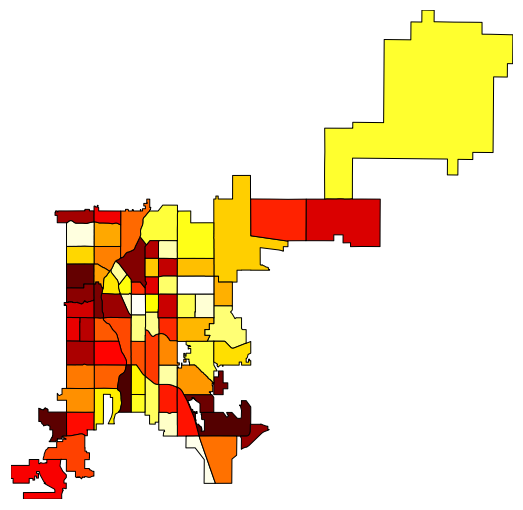

In [5]:
shp_path = r'C:\Users\aolson\Documents\Working\Python\DenverData\Denver_Census_2010.shp'
poly = ps.open(shp_path)
values = np.array(ps.open(shp_path.replace('.shp', '.dbf')).by_col('POPULATION'))

fig = figure(figsize=(9,9))

poly_m = maps.map_poly_shp(poly)
poly_c = maps.base_choropleth_unique(poly_m, values)

ax = maps.setup_ax([poly_c], [poly.bbox, poly.bbox])
fig.add_axes(ax)
show()

### High-level

Includes end-user formats that look nice. The primary function is `plot_poly_lines`.



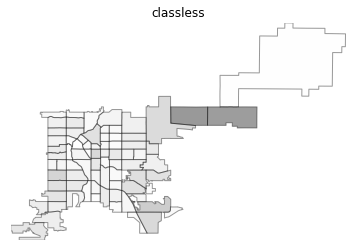

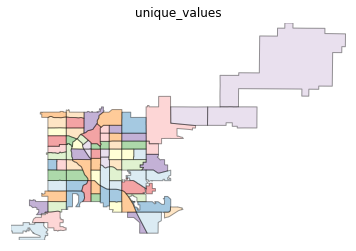

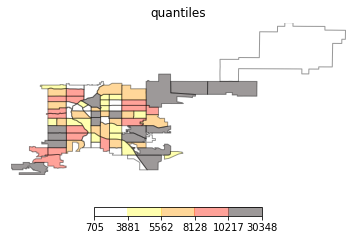

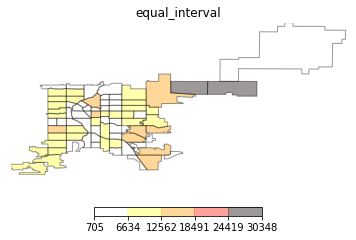

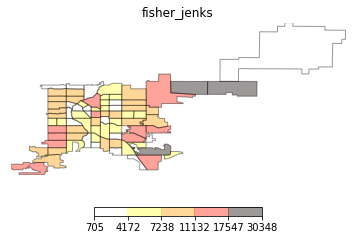

In [6]:
shp_path = r'C:\Users\aolson\Documents\Working\Python\DenverData\Denver_Census_2010.shp'
dbf_path = r'C:\Users\aolson\Documents\Working\Python\DenverData\Denver_Census_2010.dbf'
values = np.array(ps.open(dbf_path).by_col('POPULATION'))

types = ['classless', 'unique_values', 'quantiles', 'equal_interval', 'fisher_jenks']
for typ in types:
    maps.plot_choropleth(shp_path, values, typ, title=typ)

## GeoPandas 

GeoPandas uses matplotlib to to display maps and uses a variety of design classes to make your maps look pretty.

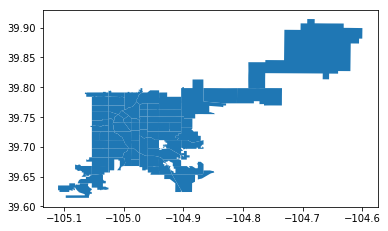

In [7]:
import geopandas as gpd
shp_link = r'C:\Users\aolson\Documents\Working\Python\DenverData\Denver_Census_2010.shp'
denver = gpd.read_file(shp_link)
denver.plot()

You can plot your polygons using the `color` class. There is a complete list of possible colors for matplotlib available [here](https://matplotlib.org/2.0.2/api/colors_api.html). This is a simple list to get started:

* `b`: blue
* `g`: green
* `r`: red
* `c`: cyan
* `m`: magenta
* `y`: yellow
* `k`: black
* `w`: white


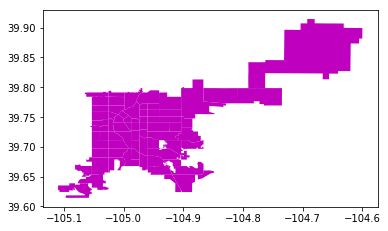

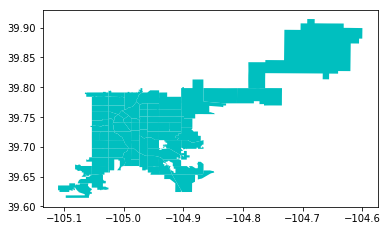

In [8]:
denver.plot(color='m')
denver.plot(color='c')

You can change the polygon outline line width by using the `linewidth` parameter. However, it is not very noticable unless I change the line color too. I can change the line color by using the `edgecolor` class:

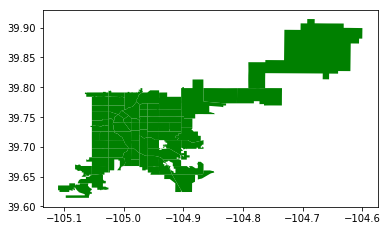

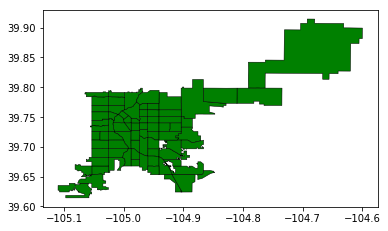

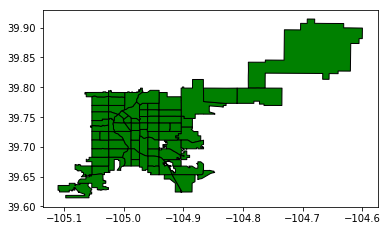

In [9]:
denver.plot(color='green',linewidth=0,edgecolor='black')
denver.plot(color='green',linewidth=0.5,edgecolor='black')
denver.plot(color='green',linewidth=1,edgecolor='black')

Notice that the data type for my data is a geopandas geodataframe:

In [10]:
type(denver)

geopandas.geodataframe.GeoDataFrame

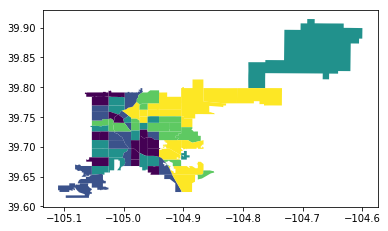

In [11]:
denver.plot(column='BLACK_2010',scheme='QUANTILES') # Uses the pysal classifier under the hood

The parameter `k` controls how many classes/categories there are in the map:

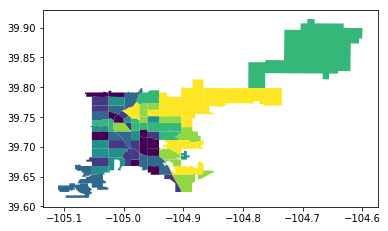

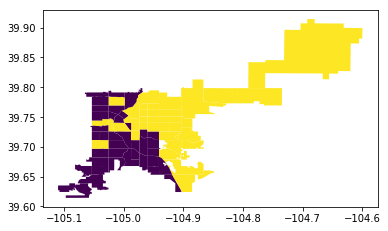

In [12]:
denver.plot(column='BLACK_2010',scheme='QUANTILES',k=7) #k is for number of categories
denver.plot(column='BLACK_2010',scheme='QUANTILES',k=2) #k is for number of categories

The `cmap` parameter changes the map to a continuous color map with a defined color theme. Possible color combinations are:

__Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r__

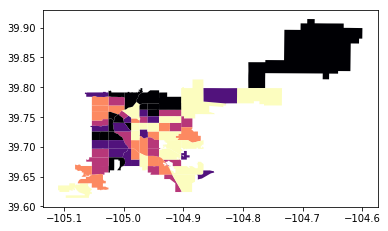

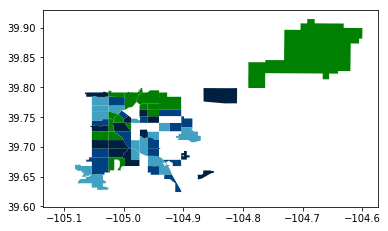

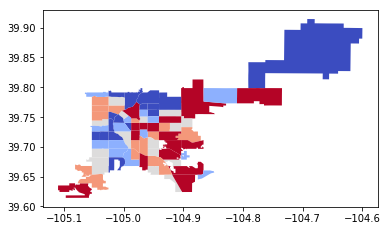

In [13]:
denver.plot(column='WHITE_2010',scheme='QUANTILES',k=5,cmap='magma') #cmap makes a continuous color map
denver.plot(column='WHITE_2010',scheme='QUANTILES',k=5,cmap='ocean') 
denver.plot(column='WHITE_2010',scheme='QUANTILES',k=5,cmap='coolwarm') 

To make the map larger you can use the `figsize` module in `matplotlib`. You can also customize the appearance of the map a bit, like removing the x/y axis.

The supported `scheme`'s are `['quantiles', 'fisher_jenks', 'equal_interval']`. 

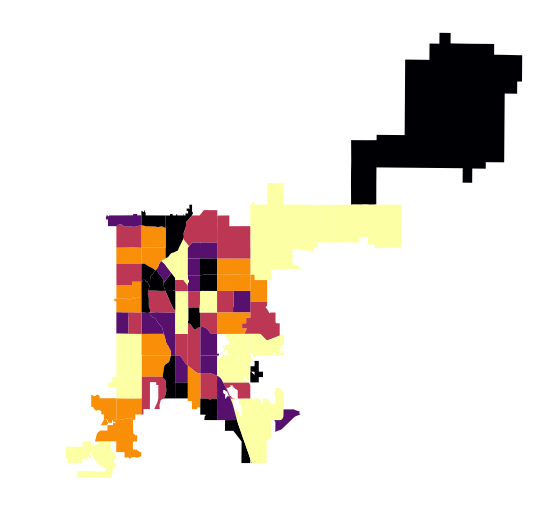

In [14]:
import matplotlib.pyplot as plt #import to make plot larger

f, ax = plt.subplots(1, figsize=(9, 9))
denver.plot(column='POPULATION',scheme='QUANTILES',k=5,cmap='inferno',linewidth=0.1,ax=ax)

ax.set_axis_off()

plt.show()

Now I change the map color with `cmap`. I change the line width using `linewidth=1` and I change the line/edge color using `edgecolor=black`.

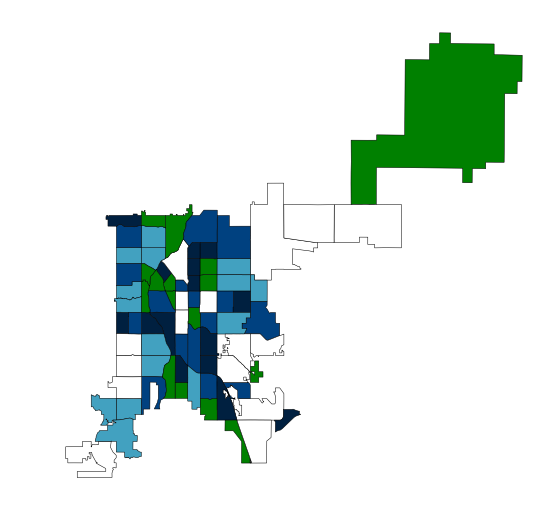

In [15]:
import matplotlib.pyplot as plt #import to make plot larger

f, ax = plt.subplots(1, figsize=(9, 9))
denver.plot(column='POPULATION',scheme='QUANTILES', \
            k=5,cmap='ocean',linewidth=0.5,ax=ax, \
           edgecolor='black')

ax.set_axis_off()

plt.show()

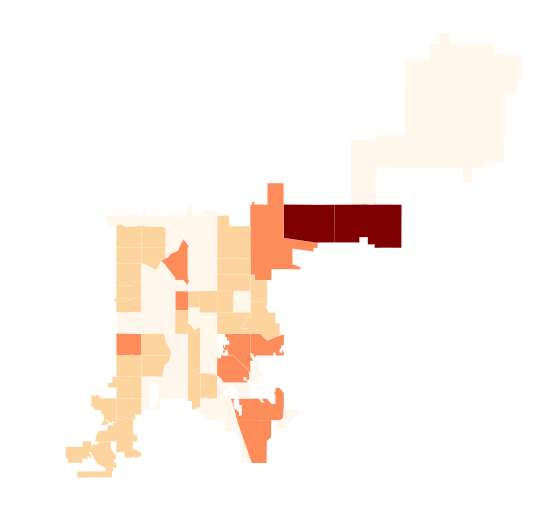

In [16]:
import matplotlib.pyplot as plt #import to make plot larger

f, ax = plt.subplots(1, figsize=(9, 9))
denver.plot(column='POPULATION',scheme='EQUAL_INTERVAL', \
            k=5,cmap='OrRd',linewidth=0.1,ax=ax, \
           edgecolor='white')

ax.set_axis_off()

plt.show()

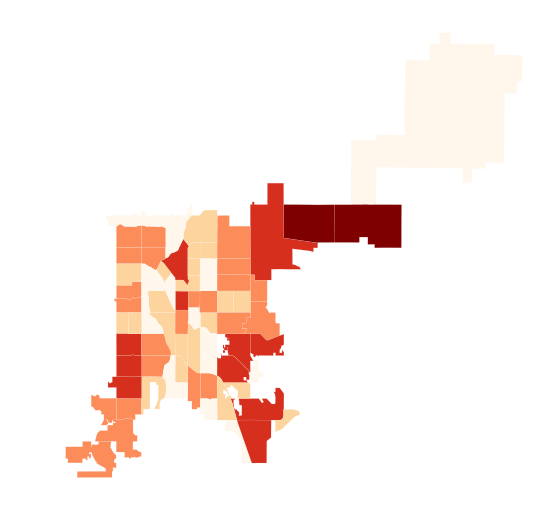

In [18]:
import matplotlib.pyplot as plt #import to make plot larger

f, ax = plt.subplots(1, figsize=(9, 9))
denver.plot(column='POPULATION',scheme='FISHER_JENKS', \
            k=5,cmap='OrRd',linewidth=0.1,ax=ax, \
           edgecolor='white')

ax.set_axis_off()

plt.show()

What are deciles? IDK, but I'm going to try it.

In [ ]:
f, ax = plt